# Section 1: Import and Organize

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mortgage_covenant_data.csv to mortgage_covenant_data (1).csv


In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical & Machine Learning
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
import xgboost as xgb

# Set plotting style
sns.set_style("whitegrid")

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [ ]:
df_mortgage = pd.read_csv('mortgage_covenant_data.csv')
df_mortgage.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


In [ ]:
df_mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

# Section 2: Exploratory Data Analysis

Covenant Density and Property Values

In [ ]:
# General overview of the dataset
print("Dataset Info:")
df_mortgage.info()

# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df_mortgage.describe())

# Check missing values
print("\nMissing Values:")
print(df_mortgage.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count           

Missing values in census_tract, property_value, income, interest_rate, and covenant_density.

# Target Variable Analysis

<ipython-input-10-4483b8360f3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="was_approved", data=df_mortgage, palette="coolwarm")


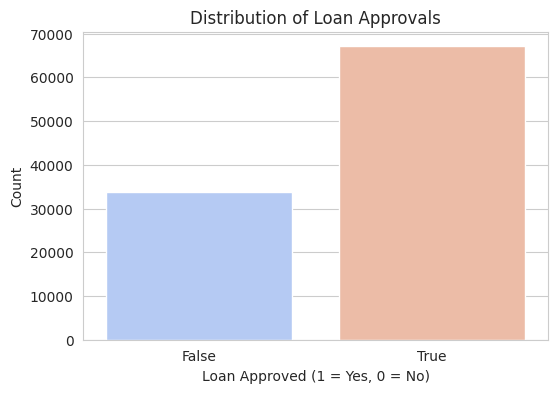

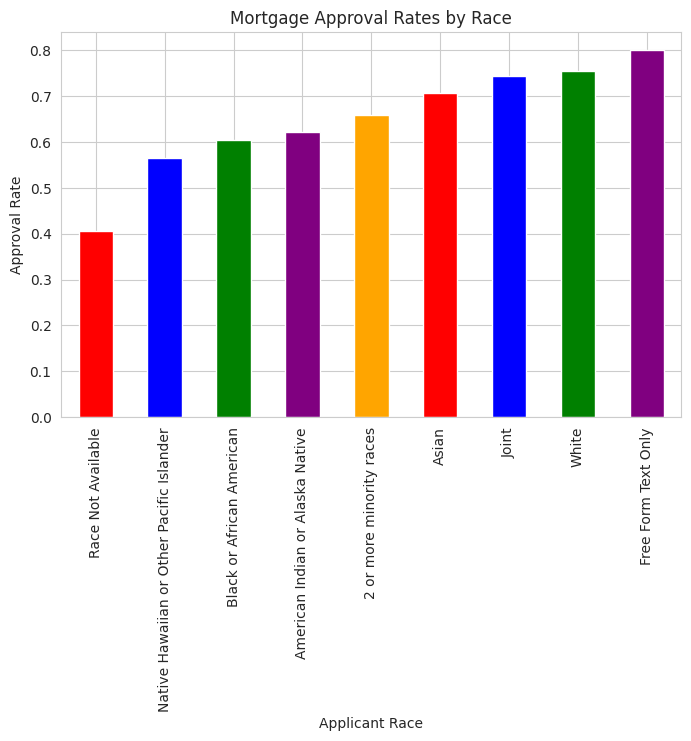

In [ ]:
# Distribution of loan approvals
plt.figure(figsize=(6, 4))
sns.countplot(x="was_approved", data=df_mortgage, palette="coolwarm")
plt.title("Distribution of Loan Approvals")
plt.xlabel("Loan Approved (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Loan approval rates by race
approval_rates = df_mortgage.groupby("derived_race")["was_approved"].mean()

plt.figure(figsize=(8, 5))
approval_rates.sort_values().plot(kind="bar", color=["red", "blue", "green", "purple", "orange"])
plt.title("Mortgage Approval Rates by Race")
plt.ylabel("Approval Rate")
plt.xlabel("Applicant Race")
plt.show()

Q: Are certain racial groups denied loans at higher rates? \
A: Native Hawaiin/Pacific Islander and Black/African American.\
Q: Is the dataset imbalanced (more approvals than denials)? \
A: Yes, there are almost double the amount of approved than there are of denials.

# Feature Distributions

Loan Amount Distribution

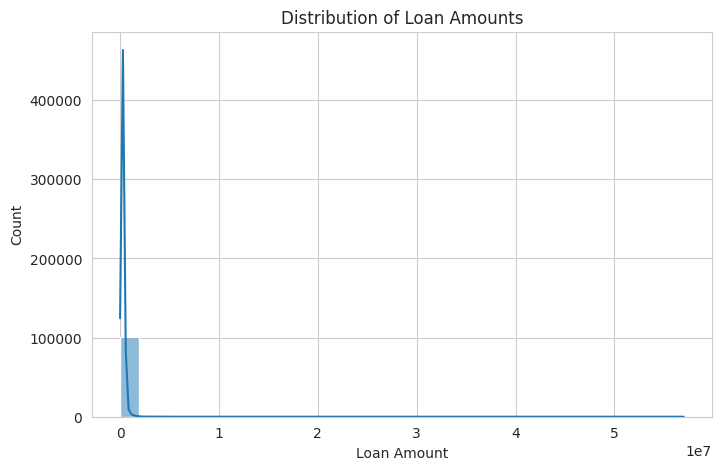

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_mortgage["loan_amount"], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

Property Loan vs. Loan Amount

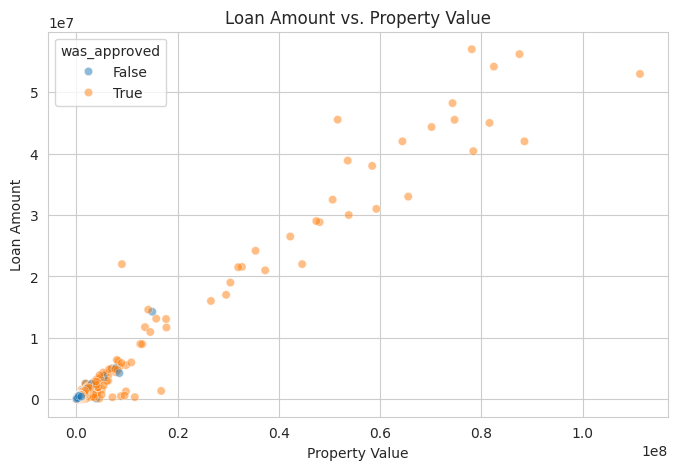

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="property_value", y="loan_amount", hue="was_approved", data=df_mortgage, alpha=0.5)
plt.title("Loan Amount vs. Property Value")
plt.xlabel("Property Value")
plt.ylabel("Loan Amount")
plt.show()

Interest Rate Distribution

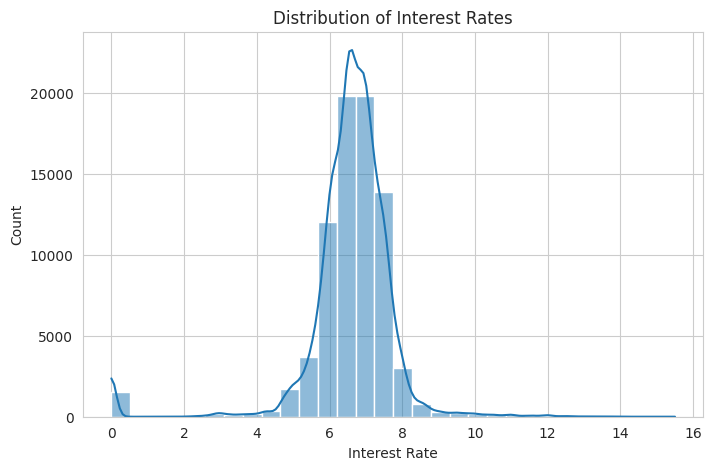

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_mortgage["interest_rate"].dropna(), bins=30, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate")
plt.ylabel("Count")
plt.show()

# Correlation Analysis

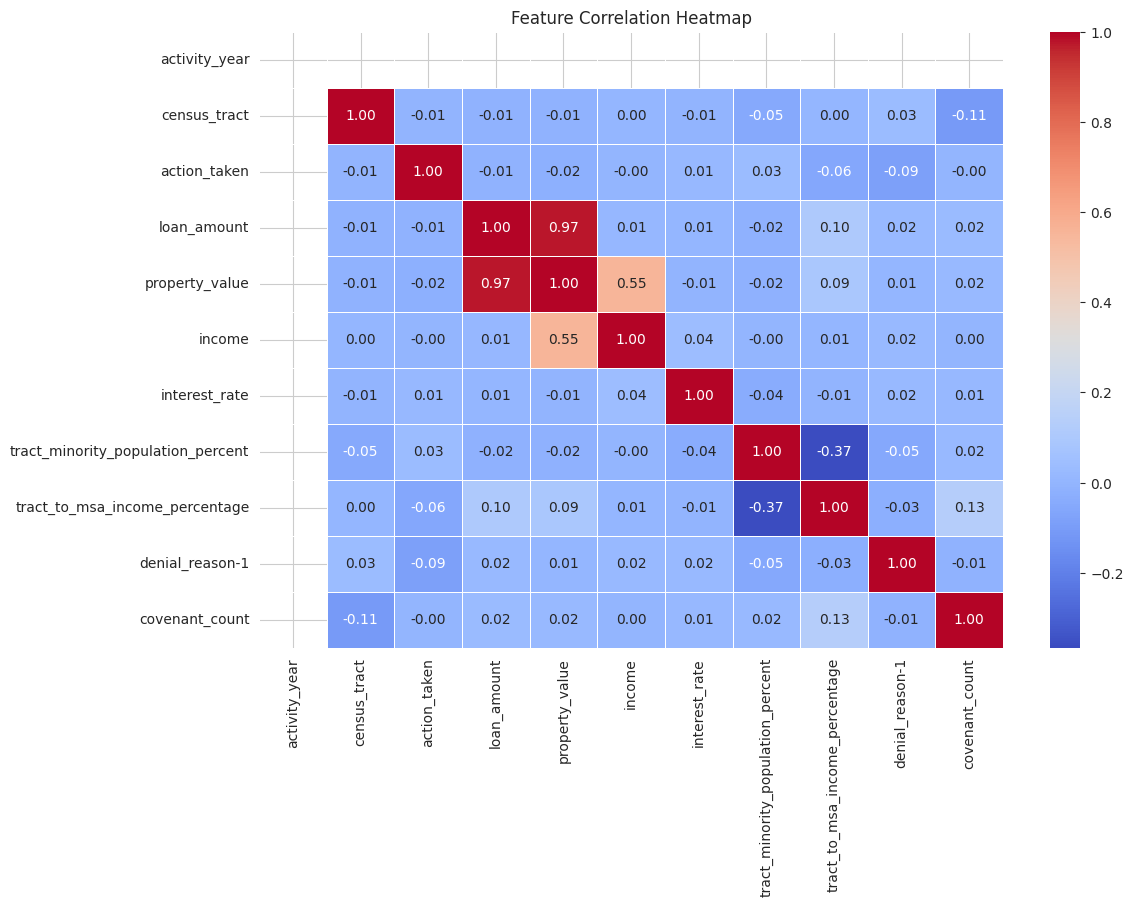

In [ ]:
# Select only numeric columns for correlation analysis
numeric_df = df_mortgage.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

Loan amount and property value have the strongest positive correlation (0.97), which makes sense since larger properties usually require larger loans. Income is moderately correlated with both loan amount (0.55) and property value (0.55), suggesting higher-income applicants tend to purchase more expensive homes. Census tract has almost no correlation with loan amounts or property values, indicating that loan size isn’t strongly tied to location in this dataset. Which I find to be a bit surprising. Higher minority population percentages in a tract are negatively correlated (-0.37) with median income, suggesting that predominantly minority areas tend to have lower median incomes. Covenant count has a weak negative correlation with census tract (-0.11) and minority population (-0.05), possibly indicating that historically segregated areas still show disparities in housing access. This will influence the focus of Section 4 (Bias / Algorithmic Analysis).

# Section 4: Bias Investigation

# Data Bias

Property Value Disparities by Race

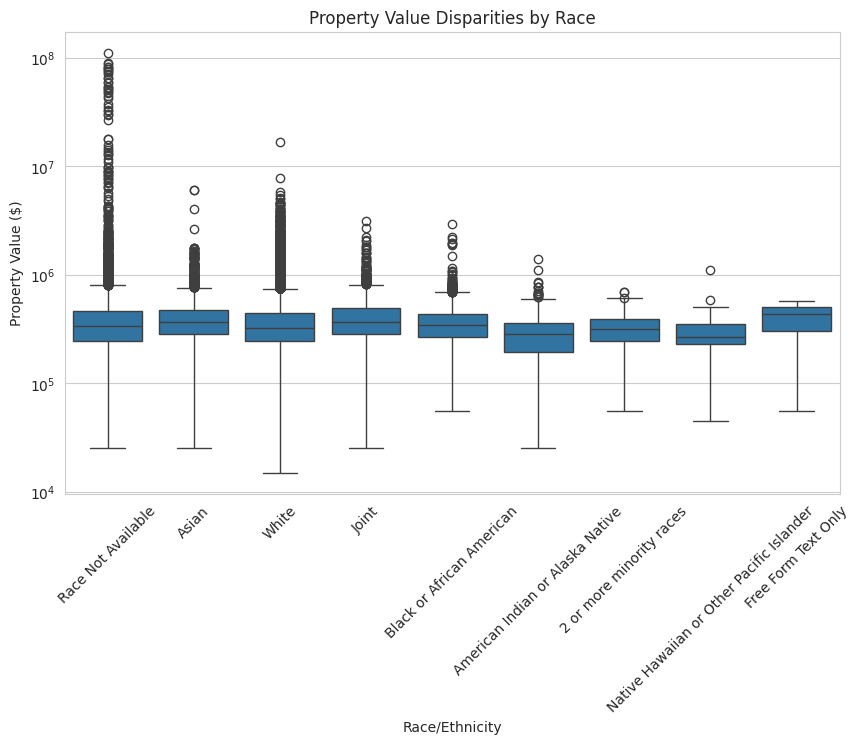

In [ ]:
# Filter dataset for approved loans only
approved_loans = df_mortgage[df_mortgage["was_approved"] == True]

# Boxplot of property values by race
plt.figure(figsize=(10, 6))
sns.boxplot(x="derived_race", y="property_value", data=approved_loans)

plt.xlabel("Race/Ethnicity")
plt.ylabel("Property Value ($)")
plt.title("Property Value Disparities by Race")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

Income Disparities by Race

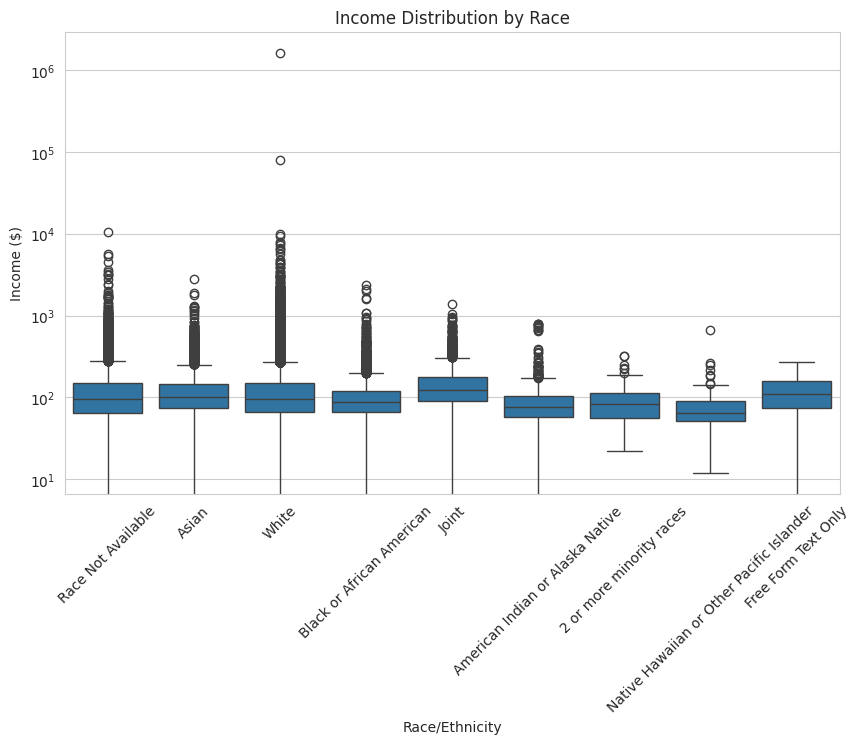

In [ ]:
# Boxplot of income levels by race
plt.figure(figsize=(10, 6))
sns.boxplot(x="derived_race", y="income", data=df_mortgage)

plt.xlabel("Race/Ethnicity")
plt.ylabel("Income ($)")
plt.title("Income Distribution by Race")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale to handle skewed income distribution
plt.show()

The median income appears relatively similar across most racial groups.
However, some groups ( White, Asian, and Joint applicants) have slightly higher medians compared to others. Some minority groups ( Native Hawaiian or Other Pacific Islander, American Indian or Alaska Native) have lower overall income variability compared to others. Assuming that income plays a significant role in loan approvals, minority applicants with lower average incomes may face higher rejection rates.

Loan Approvals by Race

<ipython-input-17-c4cfee349abe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rates.index, y=approval_rates.values, palette="coolwarm")


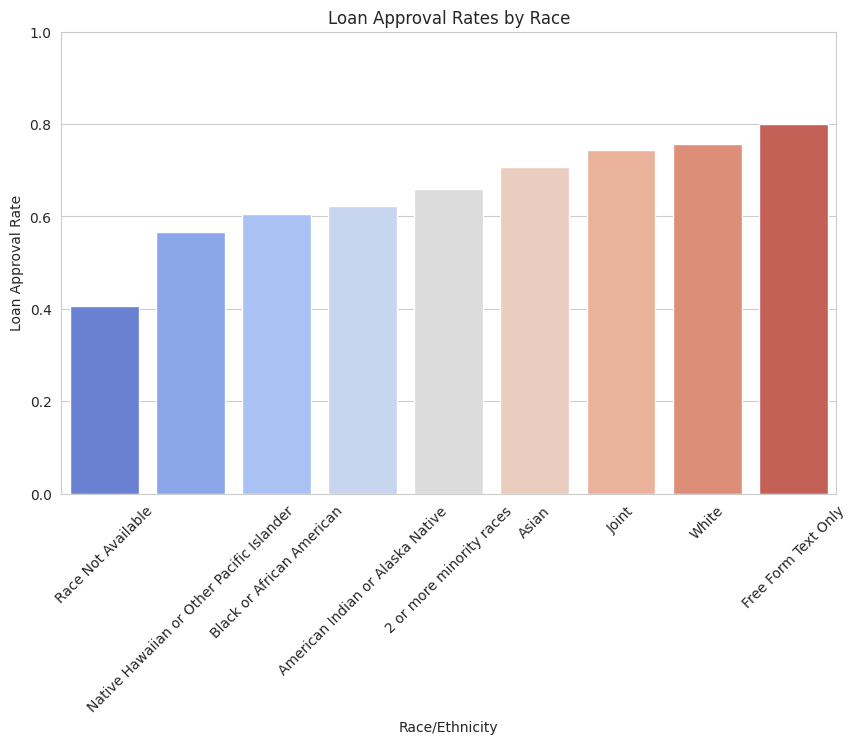

In [ ]:
# Calculate approval rates by race
approval_rates = df_mortgage.groupby("derived_race")["was_approved"].mean().sort_values()

# Bar plot of loan approval rates
plt.figure(figsize=(10, 6))
sns.barplot(x=approval_rates.index, y=approval_rates.values, palette="coolwarm")

plt.xlabel("Race/Ethnicity")
plt.ylabel("Loan Approval Rate")
plt.title("Loan Approval Rates by Race")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

White, Asian, and Joint applicants have the highest loan approval rates.
Black or African American and Native Hawaiian/Pacific Islander applicants have lower approval rates than other groups. The "Race Not Available" category has the lowest approval rate, possibly indicating that applicants who do not disclose race might face different lending outcomes. Since Black, Native Hawaiian, and Pacific Islander applicants have lower approval rates, this could indicate historical barriers in lending. Disparities in income levels, credit history, or property values might contribute to the gap, but it is worth investigating whether algorithmic bias or discriminatory lending practices play a role.

Interest Rates by Race

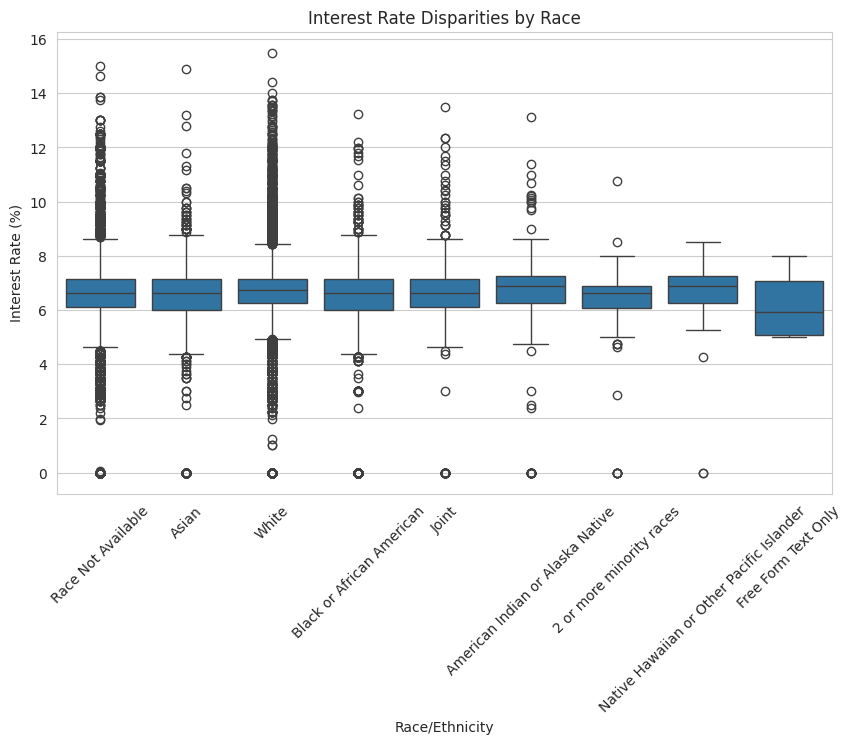

In [ ]:
# Boxplot of interest rates by race
plt.figure(figsize=(10, 6))
sns.boxplot(x="derived_race", y="interest_rate", data=df_mortgage)

plt.xlabel("Race/Ethnicity")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate Disparities by Race")
plt.xticks(rotation=45)
plt.show()

Risk Assessment: Feature Importance in Loan Approvals

<ipython-input-19-03d4ff1c1a1f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")


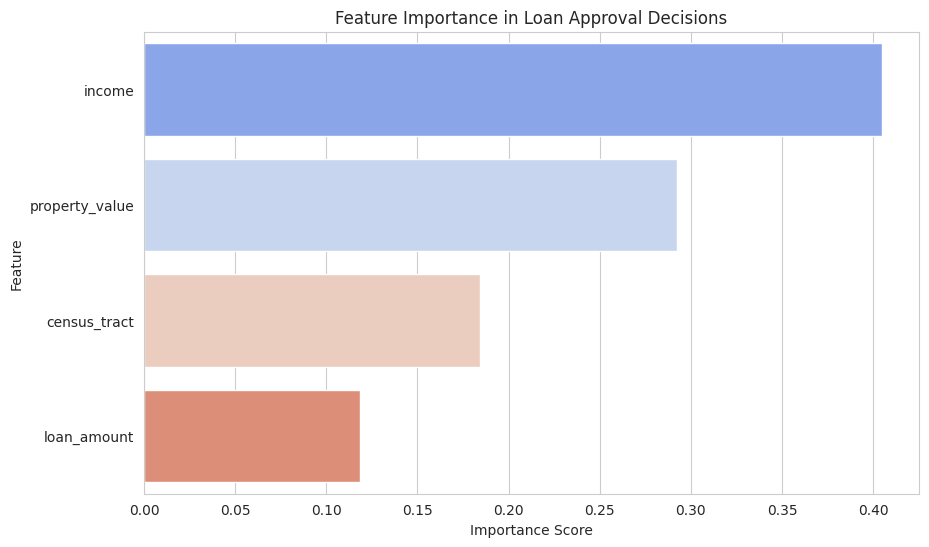

In [ ]:
# Define features and target
X = df_mortgage[["loan_amount", "property_value", "income", "census_tract"]]
y = df_mortgage["was_approved"]

# Train a simple Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Bar plot of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="coolwarm")

plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Loan Approval Decisions")
plt.show()

Income has the most significant role in determining loan approval. Property value is the second most important factor. Since income and property value dominate the decision process, lower-income and lower-property-value applicants may be disproportionately denied loans. Census tract also has a moderate influence on loan approval. This is concerning because it could reflect historical redlining or location-based discrimination, where applicants from certain neighborhoods face more difficulty getting approved. The importance of census tract suggests that location influences approvals, which could contribute to discriminatory lending practices against minority or low-income neighborhoods.

Loan Term Differences by Race

<ipython-input-20-544c225b2520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='derived_race', y='interest_rate', data=df_mortgage, palette='coolwarm')


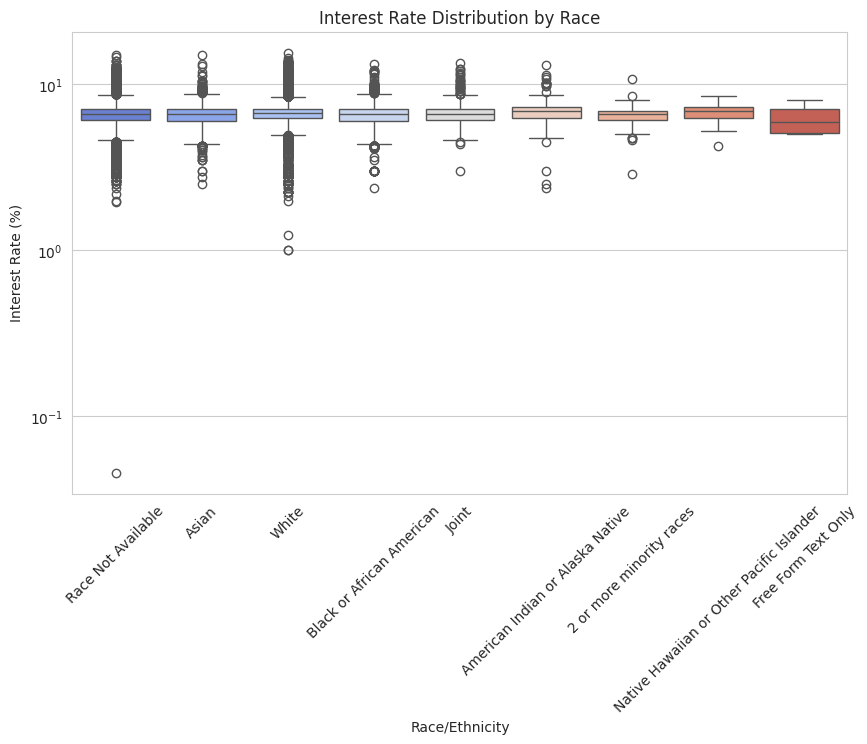

In [ ]:
# Boxplot of interest rates by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='derived_race', y='interest_rate', data=df_mortgage, palette='coolwarm')

# Labels & Title
plt.xlabel("Race/Ethnicity")
plt.ylabel("Interest Rate (%)")
plt.title("Interest Rate Distribution by Race")
plt.xticks(rotation=45)
plt.yscale("log")
plt.show()

# Algorithmic Bias

Model Fairness Test

In [ ]:
# Define features and target
X = df_mortgage[['income', 'property_value', 'loan_amount', 'census_tract']]
y = df_mortgage['was_approved']

# Handle missing values (fill with median)
X = X.fillna(X.median())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate fairness using classification report
print("Overall Model Performance:")
print(classification_report(y_test, y_pred))

Overall Model Performance:
              precision    recall  f1-score   support

       False       0.46      0.00      0.01      6731
        True       0.67      1.00      0.80     13456

    accuracy                           0.67     20187
   macro avg       0.56      0.50      0.40     20187
weighted avg       0.60      0.67      0.54     20187



When the model predicts a loan denial, it is correct 46% of the time. When the model predicts a loan approval, it is correct 67% of the time. The F1-score is very low for loan denials. This leads me to believe the model is terrible at identifying cases where loans should be denied. Since the model was trained on past loan decisions, the model inherits those biases. If historically, minorities were disproportionately denied loans, the model might reinforce this pattern, especially if it learned from skewed approval criteria. If minority applicants were historically more likely to be denied, and the model is poor at recognizing denials, this could indicate that the model does not  correct past discriminatory patterns. Groups with less/poor financial history or lower credit scores may be unfairly assessed due to biased features.

False Positives & False Negatives

In [ ]:
# Add predictions to dataset
df_mortgage['model_pred'] = model.predict(X_scaled)

# Compute False Positive Rate (FPR) & False Negative Rate (FNR) by Race
df_mortgage['FalsePositive'] = (df_mortgage['model_pred'] == 1) & (df_mortgage['was_approved'] == 0)
df_mortgage['FalseNegative'] = (df_mortgage['model_pred'] == 0) & (df_mortgage['was_approved'] == 1)

# Group by Race and calculate rates
fpr = df_mortgage.groupby('derived_race')['FalsePositive'].mean()
fnr = df_mortgage.groupby('derived_race')['FalseNegative'].mean()

# Display Bias Analysis Results
bias_results = pd.DataFrame({'False Positive Rate': fpr, 'False Negative Rate': fnr})
print("\nBias Analysis (False Positive & False Negative Rates):\n", bias_results)


Bias Analysis (False Positive & False Negative Rates):
                                            False Positive Rate  \
derived_race                                                     
2 or more minority races                              0.340741   
American Indian or Alaska Native                      0.377997   
Asian                                                 0.291617   
Black or African American                             0.395268   
Free Form Text Only                                   0.200000   
Joint                                                 0.255047   
Native Hawaiian or Other Pacific Islander             0.433628   
Race Not Available                                    0.591907   
White                                                 0.243246   

                                           False Negative Rate  
derived_race                                                    
2 or more minority races                              0.000000  
American Indian or Al

Black or African American applicants (39.5%), Native Hawaiian/Pacific Islander (43.3%), and American Indian/Alaska Native (37.8%) have the highest False Positive Rate. White applicants (24.3%) and Joint applicants (25.5%) have much lower False Positive Rates.